In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['lms(1).csv']


In [3]:
## Importing Library
import pandas as pd
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


from imblearn.under_sampling import ClusterCentroids


%matplotlib inline

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [4]:
data = pd.read_csv('../input/lms(1).csv',low_memory=False)
data.head(2)

,LMSKey,Name,MobileNo,OemName,ModelName,ParentModelName,LeadType,CurrentStatus,LeadSubStatus,Timestamp,...,ConnectoId,IsExchange,LeadScore,CarDekhoSourceId,HotScore,VisibleToDealer,isOem,InitialLeadScore,webId_category,brand_score
0,15619524,Vinod,9728542311,Mahindra,Mahindra KUV 100,Mahindra KUV 100,7,38,38,11-02-2019 19:38,...,a621a378-1fa1-04b3-3428-a7111d11f161,0.0,6.0,1.263200e+08,1.0,1.0,2.0,0.0,NaN,2.0
1,15767578,K Hemanth,9515738110,Maruti,Maruti Swift,Maruti Swift,1,38,38,22-02-2019 10:35,...,36768b6e-bfea-5bdf-610e-58e46891fbc1,0.0,10.0,1.106650e+10,4.0,1.0,0.0,0.0,NaN,10.0


- Orginal DF has 59 columns - we would first use business knowledge to reduce it further

In [5]:
data.shape

(390399, 59)

# Dropping columns 

 **`Columns`**          -->   **`Null Values`**
- LeadMedium             -->    :390367
- LeadQuality            -->    :390000
- TantativeDeliveryDate  -->    :368253
- webId_category         -->    :358411
- LeadCampaign           -->    :338788
- PurchasedBrand         -->    :336041
- PurchasedModel         -->    :335990
- utmCampaign            -->    :214614
- LeadPerformaceMonth    -->    :174076
- utmMedium              -->    :129992
- utmSource              -->    :119196
- LeadKeyWord            -->    :114305

> Columns with 100000+ null values 

> Total we have 3.9 lac rows, dropping all columns which have over 1lac null values

In [6]:
null_col = data.isnull().sum()[data.isnull
                               ().sum() > 100000]
null_col.index

Index(['PurchasedBrand', 'PurchasedModel', 'TantativeDeliveryDate',
       'LeadQuality', 'LeadCampaign', 'LeadMedium', 'LeadKeyWord',
       'LeadPerformaceMonth', 'utmSource', 'utmCampaign', 'utmMedium',
       'webId_category'],
      dtype='object')

In [7]:
## Null values in columns
data.isnull().sum().sort_values(ascending = False).to_frame().T 

,LeadMedium,LeadQuality,TantativeDeliveryDate,webId_category,LeadCampaign,PurchasedBrand,PurchasedModel,utmCampaign,LeadPerformaceMonth,utmMedium,...,OemName,ModelName,ParentModelName,LeadSubStatus,CurrentStatus,Timestamp,UpdateDate,TantativeDeadLineDays,City,LMSKey
0,390367,390000,368253,358411,338788,336041,335990,214614,174076,129992,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# #Dropping columns with 100000+ null values

data.drop(columns= null_col.index,inplace= True)

In [9]:
data.shape # from 59 columns to 47 columns 

(390399, 47)

#### Dropping Booking amount coz of extremly high skew

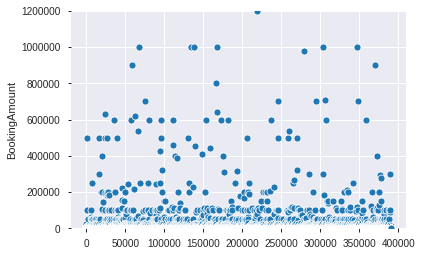

In [10]:
sns.scatterplot(data.BookingAmount.index,data.BookingAmount)
plt.ylim(0,0.12*(10**7))

plt.show()

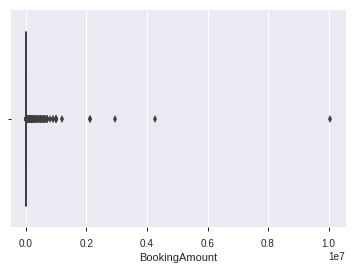

In [11]:
sns.boxplot(data.BookingAmount)

-  Coeff of variation  >> 50++ 

In [12]:
np.std(data.BookingAmount)/np.mean(data.BookingAmount)

65.63503583952584

## Analysing After dropping columns 

- Numeric 	21
- Categorical 	21
- Boolean 	1
- Date 	0
- Text (Unique) 	1
- Rejected 	3
- Unsupported 	0 

 **Warnings**   : 
 > Based on Pandas Profiling

    ApprovalStatus has 174451 / 44.7% zeros Zeros  - okay
    BookingAmount is highly skewed (γ1 = 337.4) Skewed - check
    BookingAmount has 387051 / 99.1% zeros Zeros - drop
    CarDekhoSourceId has 41349 / 10.6% zeros Zeros - drop
    City has a high cardinality: 1523 distinct values Warning - okay
    ConnectoId has 73956 / 18.9% missing values Missing - collinear with mobile - drop
    ConnectoId has a high cardinality: 267764 distinct values Warning  - drop
    CrmLeadId has 42687 / 10.9% zeros Zeros - drop
    CrmLeadSource has 61690 / 15.8% missing values Missing - check
    CrmLeadSource has a high cardinality: 169 distinct values Warning - okay
    DealerPackId is highly correlated with IsGenuine (ρ = 1) Rejected - drop packid
    EncryptedMobileNumber has a high cardinality: 332740 distinct values Warning - drop 
    Hot has 172347 / 44.1% zeros Zeros - check
    HotScore is highly correlated with Hot (ρ = 0.94032) Rejected -  check
    InitialLeadScore has 364315 / 93.3% zeros Zeros - check
    IsAlive has 5119 / 1.3% zeros Zeros 
    IsExchange is highly skewed (γ1 = 255.08) Skewed - drop
    IsExchange has 390391 / 100.0% zeros Zeros - drop
    IsGenuine is highly skewed (γ1 = 624.82) Skewed - drop
    IsGenuine has 390397 / 100.0% zeros Zeros - drop
    IsUpdatedBy has 163644 / 41.9% zeros Zeros - drop
    LeadScore has 135434 / 34.7% zeros Zeros 
    LeadSubStatus is highly correlated with CurrentStatus (ρ = 0.97298) Rejected - drop 
    MobileNo has a high cardinality: 332857 distinct values Warning 
    ModelName has a high cardinality: 206 distinct values Warning 
    Name has a high cardinality: 153444 distinct values Warning - drop 
    ParentModelName has a high cardinality: 206 distinct values Warning
    ShowToDealer is highly skewed (γ1 = 52.905) Skewed - drop
    ShowToDealer has 390243 / 100.0% zeros Zeros - drop 
    SourceModelName has 22786 / 5.8% missing values Missing 
    SourceModelName has a high cardinality: 259 distinct values Warning
    TantativeDeadLineDays has 128100 / 32.8% zeros Zeros 
    TestDriveCompletionDate has a high cardinality: 7072 distinct values Warning - make a metric based on lead insert date
    Timestamp has a high cardinality: 125476 distinct values Warning - 
    UpdateDate has a high cardinality: 20493 distinct values Warning
    VisibleToDealer has 4980 / 1.3% zeros Zeros
    WebId has a high cardinality: 374 distinct values Warning
    brand_score has 156556 / 40.1% zeros Zeros
    isOem has 135937 / 34.8% zeros Zeros
    sorceLeadId has a high cardinality: 360042 distinct values Warning - drop
    subDomain has 115376 / 29.6% zeros Zeros



In [13]:
#pandas_profiling.ProfileReport(data)

In [14]:
drop_col = ['CarDekhoSourceId','CrmLeadId','IsExchange','IsGenuine','LeadSubStatus',
'BookingAmount','DealerPackId','IsUpdatedBy','Name','ShowToDealer','ReceivingAmount',
'ConnectoId','EncryptedMobileNumber','sorceLeadId']

In [15]:
#### Dropping columns based on profiling done above

data.drop(columns=drop_col,inplace=True)

In [16]:
### After level 2 cleansing data we are left with 33 columns 
data.shape

(390399, 33)

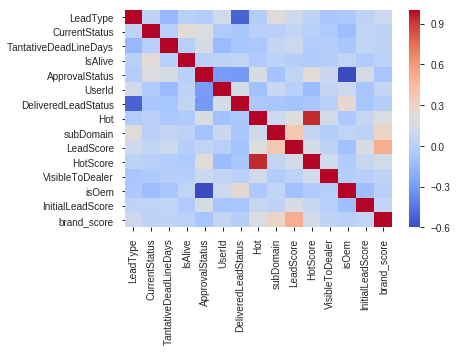

In [17]:
import seaborn as sns

sns.heatmap(data.corr(),cmap='coolwarm')

### As can be seen here, we have high multicollinearty b/w 

- Hot & Hotscore - dropping `hot` coz it is binary thus has less info.
- Leadscore & brand_score 

In [18]:
data.drop(columns=['Hot'],inplace=True)

In [19]:
data.head(2)

,LMSKey,MobileNo,OemName,ModelName,ParentModelName,LeadType,CurrentStatus,Timestamp,UpdateDate,Finance,...,CustomerLanguageCode,TestDriveCompletionDate,LeadPackType,subDomain,LeadScore,HotScore,VisibleToDealer,isOem,InitialLeadScore,brand_score
0,15619524,9728542311,Mahindra,Mahindra KUV 100,Mahindra KUV 100,7,38,11-02-2019 19:38,12-04-2019 00:02,No,...,EN,01-01-1900 00:00,sms,14.0,6.0,1.0,1.0,2.0,0.0,2.0
1,15767578,9515738110,Maruti,Maruti Swift,Maruti Swift,1,38,22-02-2019 10:35,23-04-2019 00:01,Yes,...,HI,01-01-1900 00:00,cv,14.0,10.0,4.0,1.0,0.0,0.0,10.0


In [20]:
# Object columns
data.select_dtypes('object').head(2)

,LMSKey,MobileNo,OemName,ModelName,ParentModelName,Timestamp,UpdateDate,Finance,City,Source,CrmLeadSource,CrmLeadDomain,CrmLeadType,SourceModelName,WebId,CustomerLanguageCode,TestDriveCompletionDate,LeadPackType
0,15619524,9728542311,Mahindra,Mahindra KUV 100,Mahindra KUV 100,11-02-2019 19:38,12-04-2019 00:02,No,42,CRM,cardekho,CarDekho,80,Mahindra KUV 100,offers,EN,01-01-1900 00:00,sms
1,15767578,9515738110,Maruti,Maruti Swift,Maruti Swift,22-02-2019 10:35,23-04-2019 00:01,Yes,8,CRM,zig_wheels,zigwheels.com,19,Maruti Swift,zig_wheels,HI,01-01-1900 00:00,cv


In [21]:
# In data there exists some rows where UpdateDate & Timestamp are not formatted correctly. 
# Dropping those rows

data.drop(index= data[data.UpdateDate == '0'].index,inplace=True)
data.drop(index=data.loc[data.UpdateDate.str.contains('-25'),'UpdateDate'].index,inplace=True)

#### Creating `Recency` column

In [22]:
rec = data.UpdateDate.apply(lambda x:datetime.strptime(x,'%d-%m-%Y %M:%S')) - data.Timestamp.apply(lambda x:datetime.strptime(x,'%d-%m-%Y %M:%S'))
data['recency'] = rec.dt.days

In [23]:
data.recency.head(2)

0    59
1    59
Name: recency, dtype: int64

In [24]:
a = data.recency.unique()[data.recency.unique() < 0]
a

array([-1])

In [25]:
# x = data[(data.MobileNo == '8737920384') & (data.ModelName == 'Renault KWID')]
# x[-x.duplicated(subset= ['MobileNo','ModelName'])] 

# data[data.duplicated(subset=  ['MobileNo','ModelName'])].sort_values(['MobileNo']) # this gives all copies 
#data[-data.duplicated(subset= ['MobileNo','ModelName'])].shape #this gives all uique values

In [26]:
len(data)

390104

- Duplicacy check using duplicated

In [27]:
'Duplicate :',data[data.duplicated(subset=['MobileNo','ModelName'])].shape[0],'|| Unique:',data[~data.duplicated(subset=['MobileNo','ModelName'])].shape[0]

('Duplicate :', 15246, '|| Unique:', 374858)

- Duplicacy check using drop_duplicates 

In [28]:
'Unique :',data.drop_duplicates(subset=['MobileNo','ModelName'],keep='first').shape

('Unique :', (374858, 33))

- Duplicacy check using groupby

In [29]:
# Mobile_Number * Model repeating keys - 13k values repeat
data.groupby(by = ['MobileNo','ModelName']).count()['LMSKey'][data.groupby(by = ['MobileNo','ModelName']).count()['LMSKey'] > 1].sort_values(ascending = False).agg('sum')  - data.groupby(by = ['MobileNo','ModelName']).count()['LMSKey'][data.groupby(by = ['MobileNo','ModelName']).count()['LMSKey'] > 1].sort_values(ascending = False).agg('count')

15246

- Fixing CrmLeadSource & SourceModelName            

In [30]:
data.isnull().sum().sort_values(ascending = False).head()

CrmLeadSource           61686
SourceModelName         22754
WebId                     185
CustomerLanguageCode      137
LeadPackType              126
dtype: int64

- CrmLeadSource had missing values for `connecto` & `Inbound` leads - We have imputed the values accordingly

In [31]:
data.CrmLeadSource = np.where((data.WebId == 'connecto') & (data.CrmLeadSource.isnull()),'connecto',np.where((data.CrmLeadSource.isnull()),'inbound',data.CrmLeadSource),)

- Fixing the `SourceModelName`

In [32]:
data.columns

Index(['LMSKey', 'MobileNo', 'OemName', 'ModelName', 'ParentModelName',
       'LeadType', 'CurrentStatus', 'Timestamp', 'UpdateDate', 'Finance',
       'TantativeDeadLineDays', 'City', 'IsAlive', 'Source', 'ApprovalStatus',
       'CrmLeadSource', 'CrmLeadDomain', 'UserId', 'DeliveredLeadStatus',
       'CrmLeadType', 'SourceModelName', 'WebId', 'CustomerLanguageCode',
       'TestDriveCompletionDate', 'LeadPackType', 'subDomain', 'LeadScore',
       'HotScore', 'VisibleToDealer', 'isOem', 'InitialLeadScore',
       'brand_score', 'recency'],
      dtype='object')

- Dropping `SourceModelName` coz we already have `ModelName` & `ParentModelName` which might be providing the same info!

- Also for SourceModelName == 0, we have crmleadtype == 0 also, so we are capturing that info.

In [33]:
data.drop(columns= 'SourceModelName',inplace=True)

In [34]:
data.head(2)

,LMSKey,MobileNo,OemName,ModelName,ParentModelName,LeadType,CurrentStatus,Timestamp,UpdateDate,Finance,...,TestDriveCompletionDate,LeadPackType,subDomain,LeadScore,HotScore,VisibleToDealer,isOem,InitialLeadScore,brand_score,recency
0,15619524,9728542311,Mahindra,Mahindra KUV 100,Mahindra KUV 100,7,38,11-02-2019 19:38,12-04-2019 00:02,No,...,01-01-1900 00:00,sms,14.0,6.0,1.0,1.0,2.0,0.0,2.0,59
1,15767578,9515738110,Maruti,Maruti Swift,Maruti Swift,1,38,22-02-2019 10:35,23-04-2019 00:01,Yes,...,01-01-1900 00:00,cv,14.0,10.0,4.0,1.0,0.0,0.0,10.0,59


In [35]:
data.isnull().sum().sort_values(ascending = False).head()

WebId                      185
CustomerLanguageCode       137
LeadPackType               126
Finance                    124
TestDriveCompletionDate      4
dtype: int64

In [36]:
data.shape

(390104, 32)

- Number of rows with even 1 Null values

> Since there are only 196 rows, we can drop them to get all Non Null data

In [37]:
data.isnull().any(axis =1 ).sum()

196

In [38]:
data.dropna(axis =0,inplace=True)

In [39]:
print(data.shape)

data.head(2)

(389908, 32)


,LMSKey,MobileNo,OemName,ModelName,ParentModelName,LeadType,CurrentStatus,Timestamp,UpdateDate,Finance,...,TestDriveCompletionDate,LeadPackType,subDomain,LeadScore,HotScore,VisibleToDealer,isOem,InitialLeadScore,brand_score,recency
0,15619524,9728542311,Mahindra,Mahindra KUV 100,Mahindra KUV 100,7,38,11-02-2019 19:38,12-04-2019 00:02,No,...,01-01-1900 00:00,sms,14.0,6.0,1.0,1.0,2.0,0.0,2.0,59
1,15767578,9515738110,Maruti,Maruti Swift,Maruti Swift,1,38,22-02-2019 10:35,23-04-2019 00:01,Yes,...,01-01-1900 00:00,cv,14.0,10.0,4.0,1.0,0.0,0.0,10.0,59


In [40]:
#pandas_profiling.ProfileReport(data)

#### Dropping columns 

- ApprovalStatus : 40% zeroes, Also not much info. providing
- TestDriveCompletionDate : 95% values are '1900-01-01'
- ParentModelName : same as modelname
- InitialLeadScore : 93% zeroes
- Source : 99% values are CRM

In [41]:
drop_col = ['ApprovalStatus','TestDriveCompletionDate','ParentModelName','InitialLeadScore','Source']

data.drop(columns= drop_col,inplace=True)

In [42]:
print(data.shape)

data.head(2)

(389908, 27)


,LMSKey,MobileNo,OemName,ModelName,LeadType,CurrentStatus,Timestamp,UpdateDate,Finance,TantativeDeadLineDays,...,WebId,CustomerLanguageCode,LeadPackType,subDomain,LeadScore,HotScore,VisibleToDealer,isOem,brand_score,recency
0,15619524,9728542311,Mahindra,Mahindra KUV 100,7,38,11-02-2019 19:38,12-04-2019 00:02,No,0,...,offers,EN,sms,14.0,6.0,1.0,1.0,2.0,2.0,59
1,15767578,9515738110,Maruti,Maruti Swift,1,38,22-02-2019 10:35,23-04-2019 00:01,Yes,30,...,zig_wheels,HI,cv,14.0,10.0,4.0,1.0,0.0,10.0,59


#### Creating a Dedup_level feature based on duplicay [mobile*model]

In [43]:
dup_mapper = data.groupby(['MobileNo','ModelName']).count()['LMSKey'].sort_values(ascending = False).reset_index()
dup_mapper.rename(columns={'LMSKey' :'Dedup_level' },inplace=True)
dup_mapper.head(2)

,MobileNo,ModelName,Dedup_level
0,8492944882,Renault Duster,8
1,9870290944,Hyundai Creta,8


In [44]:
data = data.merge(dup_mapper,on = ['MobileNo','ModelName'])

In [45]:
print(data.shape)

data.head(2)

(389908, 28)


,LMSKey,MobileNo,OemName,ModelName,LeadType,CurrentStatus,Timestamp,UpdateDate,Finance,TantativeDeadLineDays,...,CustomerLanguageCode,LeadPackType,subDomain,LeadScore,HotScore,VisibleToDealer,isOem,brand_score,recency,Dedup_level
0,15619524,9728542311,Mahindra,Mahindra KUV 100,7,38,11-02-2019 19:38,12-04-2019 00:02,No,0,...,EN,sms,14.0,6.0,1.0,1.0,2.0,2.0,59,1
1,15767578,9515738110,Maruti,Maruti Swift,1,38,22-02-2019 10:35,23-04-2019 00:01,Yes,30,...,HI,cv,14.0,10.0,4.0,1.0,0.0,10.0,59,1


#### Dropping columns - 

- LMSKey
- MobileNo
- Timestamp
- UpdateDate

In [46]:
data.drop(columns= ['LMSKey','MobileNo','Timestamp','UpdateDate'],inplace=True)

In [47]:
data.head(2)

,OemName,ModelName,LeadType,CurrentStatus,Finance,TantativeDeadLineDays,City,IsAlive,CrmLeadSource,CrmLeadDomain,...,CustomerLanguageCode,LeadPackType,subDomain,LeadScore,HotScore,VisibleToDealer,isOem,brand_score,recency,Dedup_level
0,Mahindra,Mahindra KUV 100,7,38,No,0,42,1.0,cardekho,CarDekho,...,EN,sms,14.0,6.0,1.0,1.0,2.0,2.0,59,1
1,Maruti,Maruti Swift,1,38,Yes,30,8,1.0,zig_wheels,zigwheels.com,...,HI,cv,14.0,10.0,4.0,1.0,0.0,10.0,59,1


#### Columns that  might show Multicollinearity


OemName	ModelName	0.999768
CrmLeadDomain	WebId	0.903585
CrmLeadSource	CrmLeadDomain	0.791447
LeadPackType	CrmLeadType	0.756191
CrmLeadType	WebId	0.689353
CrmLeadSource	WebId	0.628905
CrmLeadDomain	CrmLeadType	0.614324
CrmLeadSource	CrmLeadType	0.555864
Finance	CustomerLanguageCode	0.501675
WebId	LeadPackType	0.49618




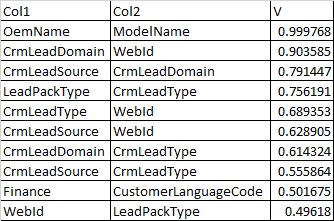

#### Checking Multicollinearity

In [48]:
cont = pd.crosstab(data.WebId,data.CrmLeadType)
cont

CrmLeadType,0,1000,1003,1004,1005,103,19,2,20,29,...,902,903,904,906,907,908,909,910,97,98
WebId,,,,,,,,,,,,,,,,,,,,,
Additional leads,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adwords,15,0,0,0,0,0,590,34,4,0,...,0,0,0,0,0,0,0,0,29,173
BCS New Vehicle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BOLT_Web_Missedcall,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bank_HDFC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CARWALE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CRM (Chat),690,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CRM (Inbound),3366,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CRM (Mail),24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
cont.sum(axis =1 )/len(data)

WebId
Additional leads       0.000056
Adwords                0.009530
BCS New Vehicle        0.000590
BOLT_Web_Missedcall    0.000005
Bank_HDFC              0.000003
                         ...   
virtual_call           0.000005
zest_april16_mx        0.000021
zica_jan16_mx          0.000110
zig_wheels             0.034026
zigwheels              0.001003
Length: 371, dtype: float64

In [50]:
chi_stat,p_value,Dof,cont_table = scipy.stats.chi2_contingency(cont)

In [51]:
chi_stat,p_value,Dof

(7611157.467133552, 0.0, 15170)

In [52]:
expected_values = pd.DataFrame(cont_table,columns=cont.columns,index=cont.index)

expected_values

CrmLeadType,0,1000,1003,1004,1005,103,19,2,20,29,...,902,903,904,906,907,908,909,910,97,98
WebId,,,,,,,,,,,,,,,,,,,,,
Additional leads,2.395519,2.213497,0.005586,0.100208,0.000451,1.754209,1.384860,0.022174,0.294870,0.000056,...,0.035152,0.082491,0.100490,0.001241,0.000056,0.022908,0.011341,0.008351,0.733732,0.039496
Adwords,404.624927,373.879684,0.943515,16.926085,0.076244,296.301794,233.915447,3.745468,49.806149,0.009530,...,5.937472,13.933523,16.973737,0.209670,0.009530,3.869364,1.915621,1.410507,123.934015,6.671317
BCS New Vehicle,25.044062,23.141100,0.058398,1.047632,0.004719,18.339454,14.478082,0.231824,3.082727,0.000590,...,0.367497,0.862409,1.050581,0.012977,0.000590,0.239492,0.118566,0.087303,7.670835,0.412918
BOLT_Web_Missedcall,0.217774,0.201227,0.000508,0.009110,0.000041,0.159474,0.125896,0.002016,0.026806,0.000005,...,0.003196,0.007499,0.009135,0.000113,0.000005,0.002083,0.001031,0.000759,0.066703,0.003591
Bank_HDFC,0.108887,0.100613,0.000254,0.004555,0.000021,0.079737,0.062948,0.001008,0.013403,0.000003,...,0.001598,0.003750,0.004568,0.000056,0.000003,0.001041,0.000516,0.000380,0.033351,0.001795
CARWALE,31.141746,28.775455,0.072617,1.302707,0.005868,22.804713,18.003180,0.288268,3.833304,0.000734,...,0.456974,1.072386,1.306375,0.016137,0.000734,0.297804,0.147435,0.108559,9.538517,0.513454
CRM (Chat),75.132185,69.423300,0.175195,3.142895,0.014157,55.018363,43.434246,0.695472,9.248182,0.001770,...,1.102491,2.587226,3.151743,0.038932,0.001770,0.718477,0.355699,0.261908,23.012506,1.238754
CRM (Inbound),366.514398,338.664967,0.854648,15.331863,0.069062,268.393929,211.883583,3.392693,45.115043,0.008633,...,5.378238,12.621162,15.375027,0.189922,0.008633,3.504919,1.735194,1.277655,112.261005,6.042964
CRM (Mail),2.613293,2.414723,0.006094,0.109318,0.000492,1.913682,1.510756,0.024190,0.321676,0.000062,...,0.038348,0.089990,0.109626,0.001354,0.000062,0.024991,0.012372,0.009110,0.800435,0.043087


In [53]:
def Cramers_v(DF):
    
    DF = DF.select_dtypes(['object','category'])
    li = []
    lt = []
    for x in DF.columns:
        #scipy.stats.chisquare(DF[x].value_counts())
        for y in DF.columns:
            if x != y:
                #f = x,y
                lt.append([x,y])
                con = pd.crosstab(DF[x],DF[y])
                con = con.values
                #chi_stat,p_value,Dof,cont_table = scipy.stats.chi2_contingency(con)
                
                chi2 = stats.chi2_contingency(con)[0]
                n = con.sum()
                phi2 = chi2 / n
                r, k = con.shape
                phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
                rcorr = r - ((r-1)**2)/(n-1)
                kcorr = k - ((k-1)**2)/(n-1)

                cramers_v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
                
                li.extend([cramers_v])
            else:
                pass
    chi_P_value = pd.DataFrame(np.vstack(lt),columns=['1st_col','2nd_col'])

    chi_P_value['cramers_v'] = li
    return chi_P_value

In [54]:
df = Cramers_v(data).sort_values('cramers_v',ascending = False)

- Columns with top 10 cramer's V

In [55]:
df[:20:2] 

,1st_col,2nd_col,cramers_v
0,OemName,ModelName,0.999768
51,CrmLeadDomain,WebId,0.903585
40,CrmLeadSource,CrmLeadDomain,0.791447
87,LeadPackType,CrmLeadType,0.756191
60,CrmLeadType,WebId,0.689353
42,CrmLeadSource,WebId,0.628905
50,CrmLeadDomain,CrmLeadType,0.614324
41,CrmLeadSource,CrmLeadType,0.555864
25,Finance,CustomerLanguageCode,0.501675
71,WebId,LeadPackType,0.496180


In [56]:
def chi_p_val(DF):
    DF = DF.select_dtypes(['object','category'])
    li = []
    lt = []
    for x in DF.columns:
        scipy.stats.chisquare(DF[x].value_counts())
        for y in DF.columns:
            if x != y:
                f = x,y
                lt.append([x,y])
                con = pd.crosstab(DF[x],DF[y])
                chi_stat,p_value,Dof,cont_table = scipy.stats.chi2_contingency(con)
                li.extend([p_value])
            else:
                pass
    chi_P_value = pd.DataFrame(np.vstack(lt),columns=['1st_col','2nd_col'])

    chi_P_value['chi_square_p_value'] = li
    return chi_P_value

In [57]:
chi_p_val(data)

,1st_col,2nd_col,chi_square_p_value
0,OemName,ModelName,0.0
1,OemName,Finance,0.0
2,OemName,City,0.0
3,OemName,CrmLeadSource,0.0
4,OemName,CrmLeadDomain,0.0
5,OemName,CrmLeadType,0.0
6,OemName,WebId,0.0
7,OemName,CustomerLanguageCode,0.0
8,OemName,LeadPackType,0.0
9,ModelName,OemName,0.0


> #### Removing `WebId` becuase of it being Collinear with 4 other features
> #### Also removing `Crmleadsource` because of high collinearity with `Crmleadsource`
 
- Features showing high Multicollinearity

    1. CrmLeadtype
    2. Crmleaddomain
    3. Crmleadsource

#### Dropping Webid & Crmleadsource - coz of high collinearity

- High collinearity can be seen
    - Crammers V value
    - Crosstab

In [58]:
#pd.crosstab(data.WebID,data.CrmLeadDomain)

In [59]:
data.columns

Index(['OemName', 'ModelName', 'LeadType', 'CurrentStatus', 'Finance',
       'TantativeDeadLineDays', 'City', 'IsAlive', 'CrmLeadSource',
       'CrmLeadDomain', 'UserId', 'DeliveredLeadStatus', 'CrmLeadType',
       'WebId', 'CustomerLanguageCode', 'LeadPackType', 'subDomain',
       'LeadScore', 'HotScore', 'VisibleToDealer', 'isOem', 'brand_score',
       'recency', 'Dedup_level'],
      dtype='object')

In [60]:
data.drop(columns= ['WebId','CrmLeadSource'],inplace=True)

In [61]:
data.head(2)

,OemName,ModelName,LeadType,CurrentStatus,Finance,TantativeDeadLineDays,City,IsAlive,CrmLeadDomain,UserId,...,CustomerLanguageCode,LeadPackType,subDomain,LeadScore,HotScore,VisibleToDealer,isOem,brand_score,recency,Dedup_level
0,Mahindra,Mahindra KUV 100,7,38,No,0,42,1.0,CarDekho,48846.0,...,EN,sms,14.0,6.0,1.0,1.0,2.0,2.0,59,1
1,Maruti,Maruti Swift,1,38,Yes,30,8,1.0,zigwheels.com,23309.0,...,HI,cv,14.0,10.0,4.0,1.0,0.0,10.0,59,1


#### Dropping data for Finance = -1

In [62]:
data.drop(index = data.loc[data.Finance == '-1','Finance'].index,inplace = True)

#### Dropping 25 rows wiht Leadscore bw 0 & 1

In [63]:
data.drop(index=data[(data.LeadScore > 0) & (data.LeadScore < 1) ].index,inplace=True)

In [64]:
data['target'] = np.where(data.CurrentStatus.isin(['37','77']),'success','fail')
data.head(2)

,OemName,ModelName,LeadType,CurrentStatus,Finance,TantativeDeadLineDays,City,IsAlive,CrmLeadDomain,UserId,...,LeadPackType,subDomain,LeadScore,HotScore,VisibleToDealer,isOem,brand_score,recency,Dedup_level,target
0,Mahindra,Mahindra KUV 100,7,38,No,0,42,1.0,CarDekho,48846.0,...,sms,14.0,6.0,1.0,1.0,2.0,2.0,59,1,fail
1,Maruti,Maruti Swift,1,38,Yes,30,8,1.0,zigwheels.com,23309.0,...,cv,14.0,10.0,4.0,1.0,0.0,10.0,59,1,fail


In [65]:
data.apply(lambda x:x.nunique())

OemName                    24
ModelName                 205
LeadType                    5
CurrentStatus              11
Finance                     2
TantativeDeadLineDays      18
City                     1522
IsAlive                     2
CrmLeadDomain              12
UserId                   3263
DeliveredLeadStatus         6
CrmLeadType                42
CustomerLanguageCode       12
LeadPackType                3
subDomain                   8
LeadScore                  11
HotScore                    7
VisibleToDealer             2
isOem                       4
brand_score                11
recency                   859
Dedup_level                 8
target                      2
dtype: int64

#### Imputing Categorical variables

In [66]:
def Cat_outlier(df,min_,max_):
    for x in df.columns:
            y_mean = max(min(max_,df[x].value_counts().mean()),min_)
            y_median = max(min(max_,df[x].value_counts().median()),min_)
            
            df1 = pd.DataFrame({'Mean':df[x].value_counts()[df[x].value_counts() < y_mean].agg(['sum','count']),
                                'Median':df[x].value_counts()[df[x].value_counts() < y_median].agg(['sum','count'])})
            df1.index = ['Obs_sum_if_<_cuttoff:','No_labels_less_than_cuttoff:']
            df1.loc['Total_labels','Mean'],df1.loc['Total_labels','Median'] = df[x].value_counts().count(),df[x].value_counts().count()
            
            df1.loc['Min_DF.Col.value_counts().mean/median():','Mean'],df1.loc['Min_DF.Col.value_counts().mean/median():','Median'] = y_mean,y_median
            df1.loc['DF.Col.value_counts().mean/median():','Mean'],df1.loc['DF.Col.value_counts().mean/median():','Median'] = np.round(df[x].value_counts().mean()),np.round(df[x].value_counts().median())
            
            print(x)
            print(df1,'\n --------------------------------------')

- Creating a data_ as copy & Making the outlier categorical variable imputation there

In [67]:
data_ = data.copy()

- Imputing the categoical values

In [68]:
cols = data.columns.difference(['TantativeDeadLineDays',  
'LeadScore',
'HotScore', 
'brand_score', 
'recency',
'Dedup_level'])

data.columns[~data.columns.isin(cols)]

Index(['TantativeDeadLineDays', 'LeadScore', 'HotScore', 'brand_score',
       'recency', 'Dedup_level'],
      dtype='object')

#### Imputation 

In [69]:
max_  = 100
min_ = 30

for t in cols:    
    data_.loc[data_[t].isin(data_[t].value_counts()[data_[t].value_counts()  < max(min(max_,data_[t].value_counts().median()),min_)].index.tolist()),t] = 'other'

- Original Dataset

In [70]:


Cat_outlier(data,30,100)

OemName
                                             Mean  Median
Obs_sum_if_<_cuttoff:                       143.0   143.0
No_labels_less_than_cuttoff:                  2.0     2.0
Total_labels                                 24.0    24.0
Min_DF.Col.value_counts().mean/median():    100.0   100.0
DF.Col.value_counts().mean/median():      16245.0  1614.0 
 --------------------------------------
ModelName
                                            Mean  Median
Obs_sum_if_<_cuttoff:                     2860.0  2860.0
No_labels_less_than_cuttoff:                98.0    98.0
Total_labels                               205.0   205.0
Min_DF.Col.value_counts().mean/median():   100.0   100.0
DF.Col.value_counts().mean/median():      1902.0   130.0 
 --------------------------------------
LeadType
                                             Mean   Median
Obs_sum_if_<_cuttoff:                         0.0      0.0
No_labels_less_than_cuttoff:                  0.0      0.0
Total_labels            

target
                                              Mean    Median
Obs_sum_if_<_cuttoff:                          0.0       0.0
No_labels_less_than_cuttoff:                   0.0       0.0
Total_labels                                   2.0       2.0
Min_DF.Col.value_counts().mean/median():     100.0     100.0
DF.Col.value_counts().mean/median():      194940.0  194940.0 
 --------------------------------------


- Imputed Dataset

In [71]:
Cat_outlier(data_,30,100)

OemName
                                             Mean  Median
Obs_sum_if_<_cuttoff:                         0.0     0.0
No_labels_less_than_cuttoff:                  0.0     0.0
Total_labels                                 23.0    23.0
Min_DF.Col.value_counts().mean/median():    100.0   100.0
DF.Col.value_counts().mean/median():      16951.0  1636.0 
 --------------------------------------
ModelName
                                            Mean  Median
Obs_sum_if_<_cuttoff:                        0.0     0.0
No_labels_less_than_cuttoff:                 0.0     0.0
Total_labels                               108.0   108.0
Min_DF.Col.value_counts().mean/median():   100.0   100.0
DF.Col.value_counts().mean/median():      3610.0  1132.0 
 --------------------------------------
LeadType
                                             Mean   Median
Obs_sum_if_<_cuttoff:                         0.0      0.0
No_labels_less_than_cuttoff:                  0.0      0.0
Total_labels            

target
                                              Mean    Median
Obs_sum_if_<_cuttoff:                          0.0       0.0
No_labels_less_than_cuttoff:                   0.0       0.0
Total_labels                                   2.0       2.0
Min_DF.Col.value_counts().mean/median():     100.0     100.0
DF.Col.value_counts().mean/median():      194940.0  194940.0 
 --------------------------------------


#### Removing Current Status

In [72]:
data_.drop(columns= 'CurrentStatus',inplace = True)

- Finally we are left wiht **22** columns

In [73]:
data_.tail()

,OemName,ModelName,LeadType,Finance,TantativeDeadLineDays,City,IsAlive,CrmLeadDomain,UserId,DeliveredLeadStatus,...,LeadPackType,subDomain,LeadScore,HotScore,VisibleToDealer,isOem,brand_score,recency,Dedup_level,target
389903,Hyundai,Hyundai Grand i10,7,No,0,255,1,zigwheels.com,15618,28,...,cv,0,0.0,1.0,1,0,0.0,65,1,fail
389904,Mahindra,Mahindra XUV300,1,No,0,1650,1,dealersite,59932,2,...,cv,0,6.0,1.0,1,0,0.0,11,1,success
389905,Tata,Tata Nexon,1,Yes,7,84,1,CarDekho,16120,2,...,cv,0,0.0,4.0,1,1,1.0,20,1,fail
389906,Mahindra,Mahindra XUV300,7,No,0,8,1,CarDekho,48832,28,...,sms,14,0.0,1.0,1,2,0.0,59,1,fail
389907,Tata,Tata Bolt,1,Yes,90,198,1,CarDekho,1171,2,...,cv,14,7.0,1.0,1,1,8.0,15,1,fail


#### Checking for Ordinal Variables

In [74]:
#data_.City.value_counts()


#### ORDINAL VARS
- TantativeDeadLineDays  
- LeadScore int64
- HotScore int64
- brand_score int64
- recency
- Dedup_level

In [75]:
data_.dtypes 

OemName                   object
ModelName                 object
LeadType                   int64
Finance                   object
TantativeDeadLineDays      int64
City                      object
IsAlive                    int64
CrmLeadDomain             object
UserId                    object
DeliveredLeadStatus        int64
CrmLeadType               object
CustomerLanguageCode      object
LeadPackType              object
subDomain                  int64
LeadScore                float64
HotScore                 float64
VisibleToDealer            int64
isOem                      int64
brand_score              float64
recency                    int64
Dedup_level                int64
target                    object
dtype: object

#### `value_counts()` for nominal variables

In [76]:
col_mask = data_.columns[~data_.columns.isin(cols)]
col_mask

Index(['TantativeDeadLineDays', 'LeadScore', 'HotScore', 'brand_score',
       'recency', 'Dedup_level'],
      dtype='object')

# EDA

https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas

In [77]:
data_.head(2)

,OemName,ModelName,LeadType,Finance,TantativeDeadLineDays,City,IsAlive,CrmLeadDomain,UserId,DeliveredLeadStatus,...,LeadPackType,subDomain,LeadScore,HotScore,VisibleToDealer,isOem,brand_score,recency,Dedup_level,target
0,Mahindra,Mahindra KUV 100,7,No,0,42,1,CarDekho,48846,28,...,sms,14,6.0,1.0,1,2,2.0,59,1,fail
1,Maruti,Maruti Swift,1,Yes,30,8,1,zigwheels.com,23309,2,...,cv,14,10.0,4.0,1,0,10.0,59,1,fail


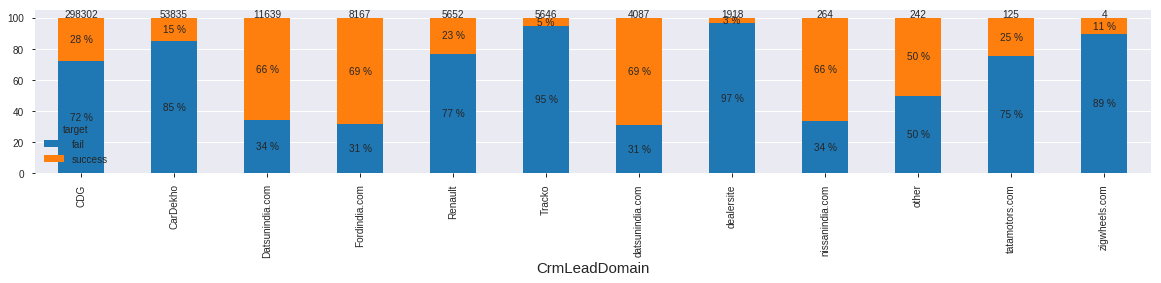

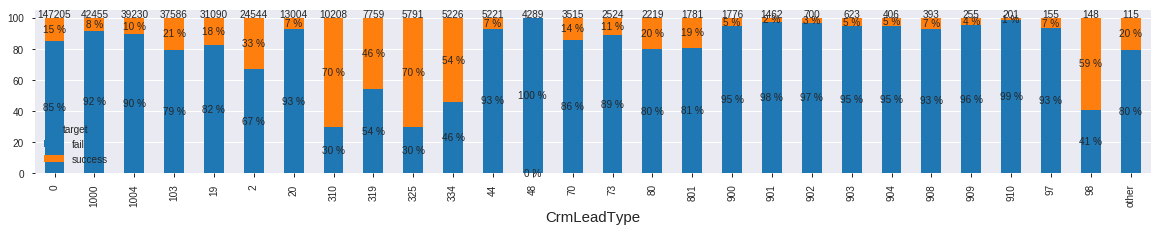

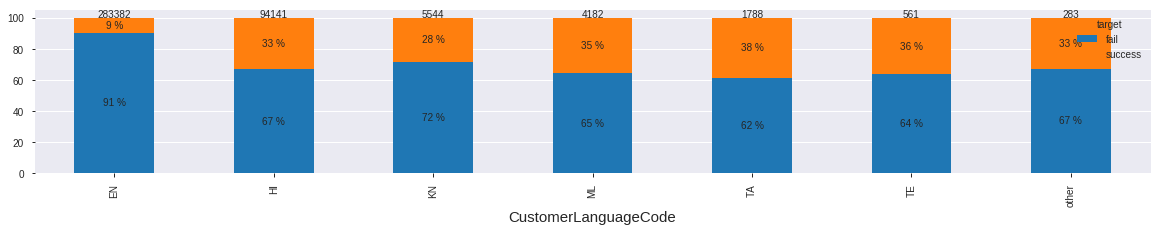

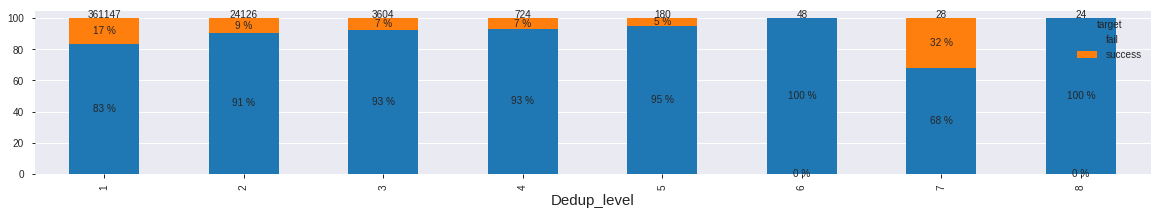

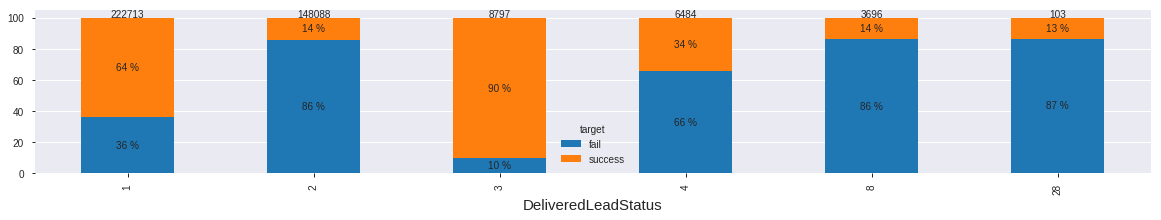

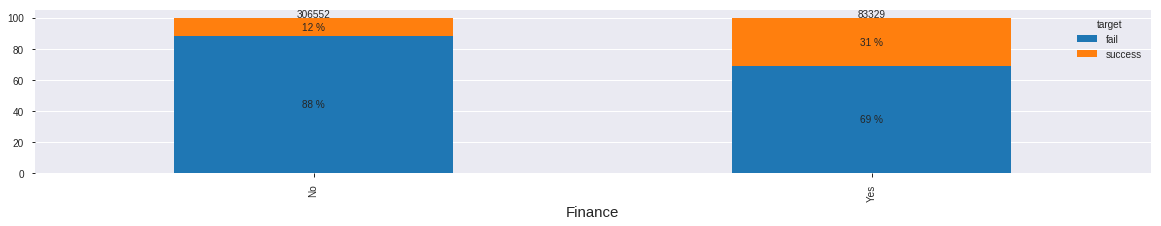

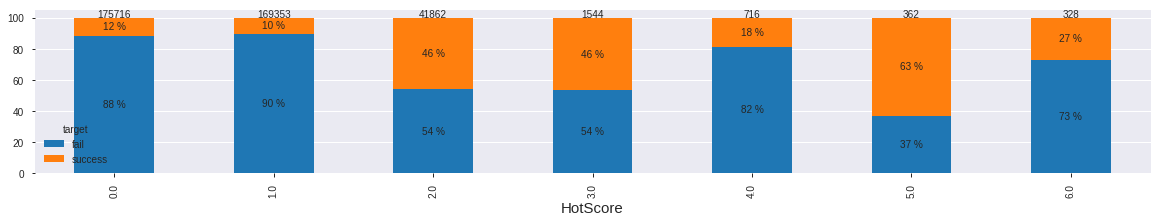

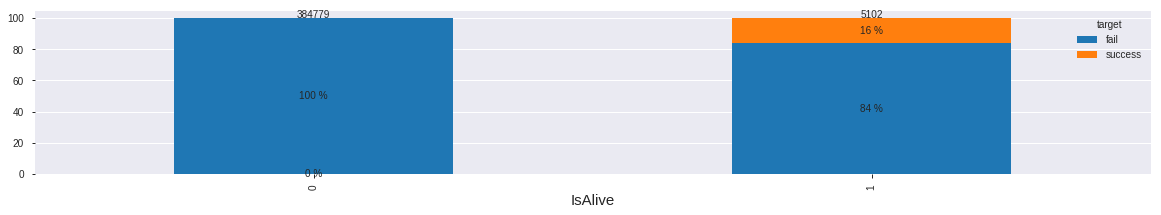

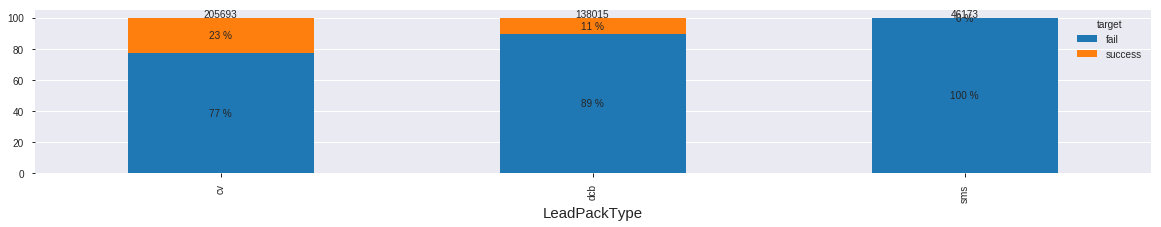

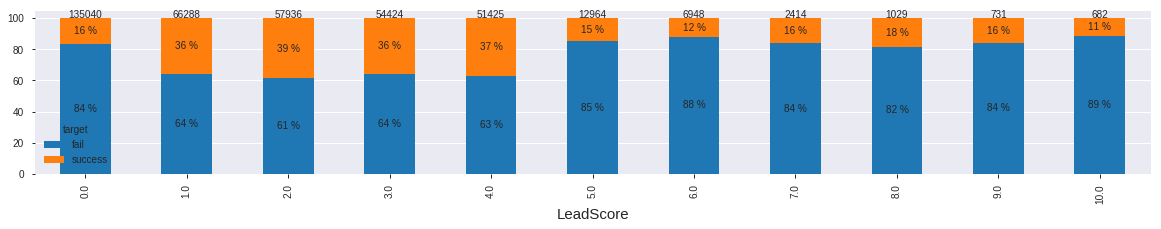

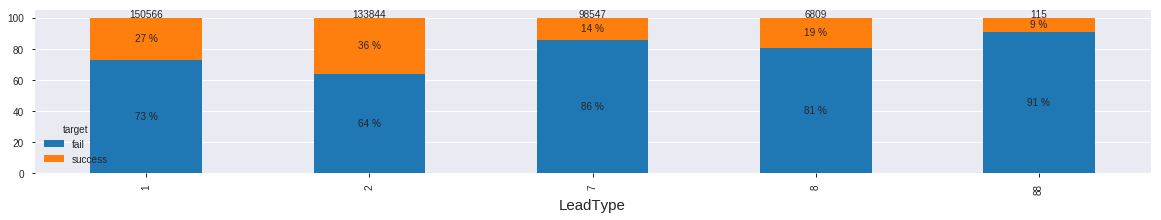

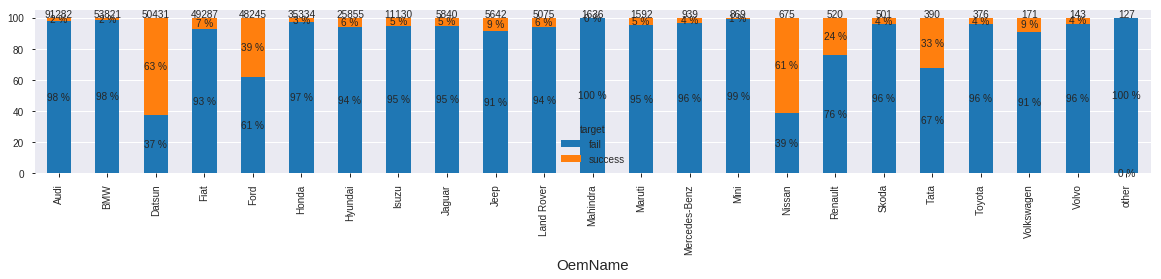

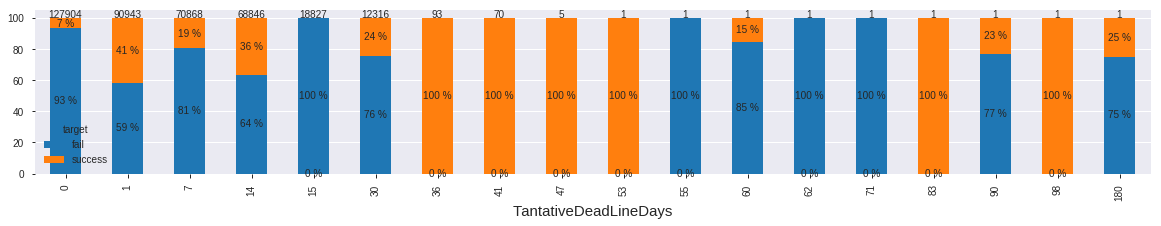

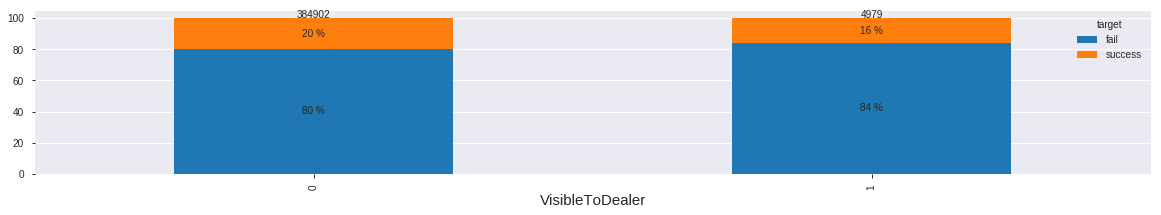

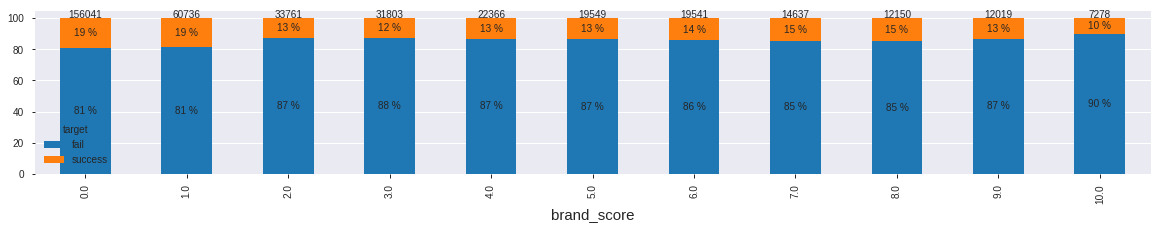

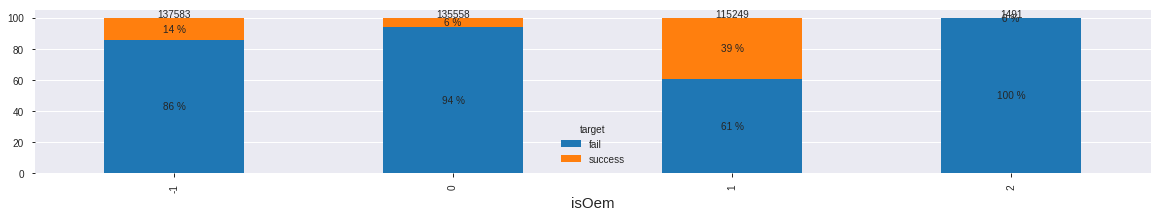

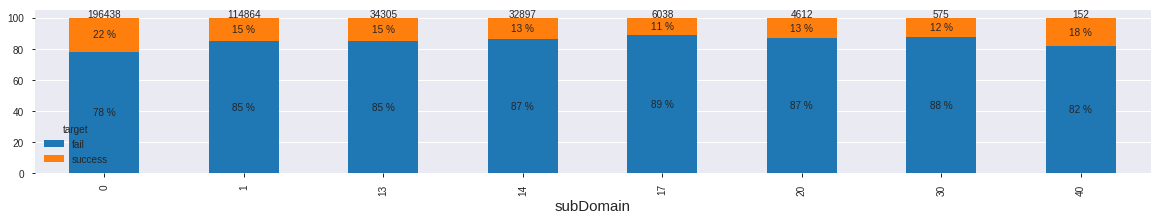

In [78]:
for u  in data_.columns[data_.nunique() < 30].difference(['target']):
    
    #ax = plt.gca()
    ct = pd.crosstab(data_[u],data_.target,normalize='index')*100
    ct.plot.bar(stacked=True, figsize=(20,3))
    plt.xlabel(plt.gca().get_xlabel(),fontsize = 15)
    
    ax = plt.gca()
    for p in ax.patches:
        #print(p)
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
    
    z = data_[u].value_counts().values
    ax1 = plt.gca()
    
    for i,j,p in  zip(np.arange(data_[u].nunique()),z,ax1.patches):
        
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        plt.text(x =x+width/2, y = 102, s = j , size = 10,horizontalalignment='center', verticalalignment='center')

In [79]:
data_.head()

,OemName,ModelName,LeadType,Finance,TantativeDeadLineDays,City,IsAlive,CrmLeadDomain,UserId,DeliveredLeadStatus,...,LeadPackType,subDomain,LeadScore,HotScore,VisibleToDealer,isOem,brand_score,recency,Dedup_level,target
0,Mahindra,Mahindra KUV 100,7,No,0,42,1,CarDekho,48846,28,...,sms,14,6.0,1.0,1,2,2.0,59,1,fail
1,Maruti,Maruti Swift,1,Yes,30,8,1,zigwheels.com,23309,2,...,cv,14,10.0,4.0,1,0,10.0,59,1,fail
2,Mahindra,Mahindra Marazzo,7,No,60,other,1,CarDekho,other,28,...,sms,13,7.0,1.0,1,2,2.0,59,1,fail
3,Tata,Tata Hexa,1,Yes,90,280,1,CarDekho,2602,2,...,cv,13,9.0,1.0,1,1,1.0,126,1,success
4,Mahindra,Mahindra XUV300,7,No,0,1650,1,CarDekho,58877,28,...,sms,14,7.0,1.0,1,2,5.0,59,1,fail


Text(0.5, 1.0, 'NON OUTLIER')

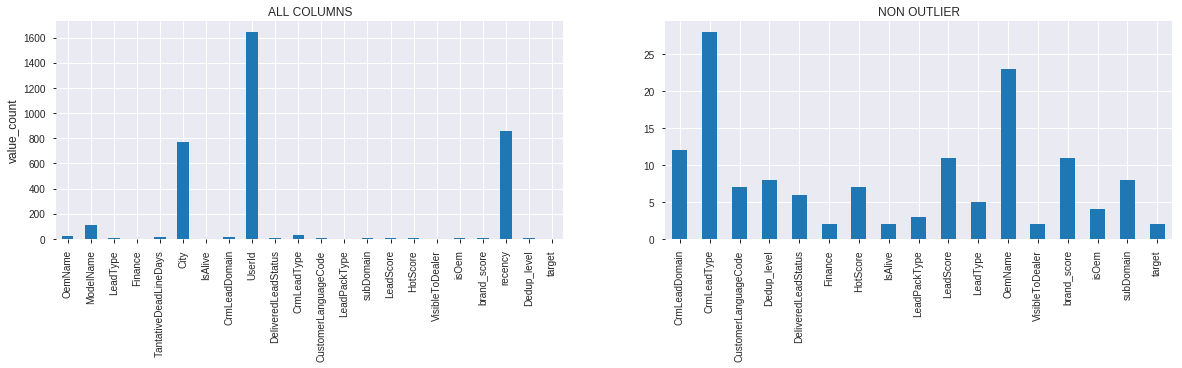

In [80]:
%matplotlib inline

plt.figure(figsize=(20,4))

plt.subplot(121)
data_.nunique().plot(kind = 'bar') 
plt.ylabel('value_count',fontsize=12)
plt.title('ALL COLUMNS')

plt.subplot(122) 
data_[data_.columns.difference(['City','TantativeDeadLineDays','recency','ModelName','UserId'])].nunique().plot(kind = 'bar')
plt.title('NON OUTLIER')

# modelname - 108
# city - 768  --> drop
# userid - 1645 --> drop
# recency - 859 

In [81]:
df_cramer = Cramers_v(data_)

#### Dropping `City` & `userID` because they have high # of labels which are difficult to encode

In [82]:
data_.drop(columns=['City','UserId'],inplace = True)

#### Correlation - Crammer's V

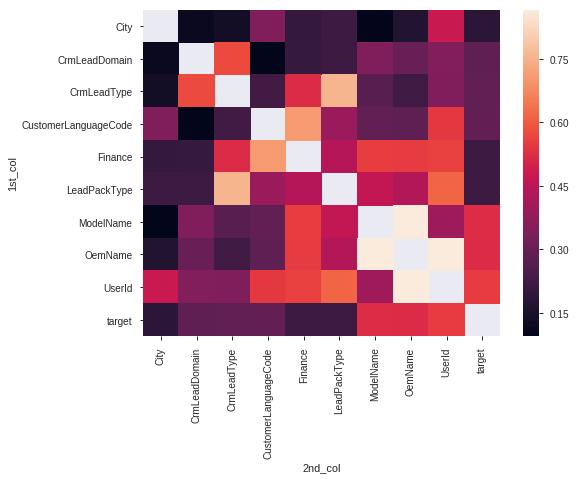

In [83]:
crosstab = pd.crosstab(index = df_cramer['1st_col'],columns=df_cramer['2nd_col'],values=df_cramer['cramers_v'],aggfunc='sum')

plt.figure(figsize=(8,6))
sns.heatmap(crosstab)

#### Modelname also has `108` discrete values

> converting 108 discrete values into 12 values

In [84]:
a = pd.crosstab(data_.ModelName,data_.target,normalize='index')*100
b = data_.ModelName.value_counts().to_frame()

c  = a.merge(b, left_index = True, right_index = True)


c = c.sort_values('ModelName',ascending = False)
c = c.rename(columns = {'ModelName' : 'counts'})

x = c.sort_values('counts',ascending = False).cumsum()*100/len(data_.ModelName)
c['%le'] = x['counts']


c['count_bin'] = pd.qcut(c.counts,3,labels=np.arange(1,4))
c['succes_bin'] = pd.qcut(c.success,4,labels=np.arange(1,5))

c['bin'] =   c.count_bin.astype('str') + "-" + c.succes_bin.astype('str')  

c.groupby('count_bin').agg(['min','max'])['counts']

c.head()
# 4 in count bin denote large count, 1 denote low count
# 4 in success bin denote high success, 1 denote low success

,fail,success,counts,%le,count_bin,succes_bin,bin
Mahindra Marazzo,99.892288,0.107712,48277,12.382496,3,1,3-1
Renault KWID,75.165219,24.834781,39493,22.511997,3,4,3-4
Tata Tiago,65.140768,34.859232,22981,28.406360,3,4,3-4
Honda Amaze,97.016648,2.983352,22525,34.183764,3,1,3-1
Mahindra XUV300,99.658272,0.341728,21362,39.662871,3,1,3-1


In [85]:
c.success.quantile([0,.25,.5,.75,1])

0.00     0.000000
0.25     3.331528
0.50     5.370122
0.75    20.542672
1.00    66.645285
Name: success, dtype: float64

In [86]:
data_= data_.merge(c[['bin']],left_on= 'ModelName' , right_on = c.index)
data_.rename(columns={'bin': 'model_cat'},inplace=True)

data_.drop(columns='ModelName',inplace = True)

#### Reducing 25+ labels in Crmleadtype to 10


In [87]:
data_.CrmLeadType.unique()

df = pd.DataFrame(np.where(data_.CrmLeadType.isin(['80', '1000', '103', '0', '70', '73', '97', '44', '19', '20','900','2','48']),data_.CrmLeadType,'other'),columns=['crmleadtype_cat'])
df.head(2)

,crmleadtype_cat
0,80
1,1000


In [88]:
data_ = data_.merge(df,left_index=True,right_index=True)
data_.drop(columns='CrmLeadType',inplace = True)

In [89]:
data_.head()

,OemName,LeadType,Finance,TantativeDeadLineDays,IsAlive,CrmLeadDomain,DeliveredLeadStatus,CustomerLanguageCode,LeadPackType,subDomain,LeadScore,HotScore,VisibleToDealer,isOem,brand_score,recency,Dedup_level,target,model_cat,crmleadtype_cat
0,Mahindra,7,No,0,1,CarDekho,28,EN,sms,14,6.0,1.0,1,2,2.0,59,1,fail,3-1,80
1,Mahindra,7,No,30,1,CarDekho,28,EN,cv,13,9.0,4.0,1,2,3.0,59,2,fail,3-1,1000
2,Mahindra,7,No,30,1,CarDekho,28,EN,cv,13,9.0,4.0,1,2,0.0,59,2,fail,3-1,103
3,Mahindra,7,No,0,1,CarDekho,28,EN,sms,0,0.0,1.0,1,2,0.0,71,2,fail,3-1,0
4,Mahindra,7,No,0,1,CarDekho,28,EN,sms,0,0.0,1.0,1,2,0.0,60,2,fail,3-1,0


## Finally 

#### Encoding to first categorical vars & then label encoding

In [90]:
col_mask

Index(['TantativeDeadLineDays', 'LeadScore', 'HotScore', 'brand_score',
       'recency', 'Dedup_level'],
      dtype='object')

In [91]:
for x in data_.columns.difference(col_mask):
    data_[x] = data_[x].astype('object')

In [92]:
data_.dtypes.head(2)

OemName     object
LeadType    object
dtype: object

# ML

In [93]:
y = data_.copy()

In [94]:
z = y[y.columns.difference(col_mask)]
z.head()

,CrmLeadDomain,CustomerLanguageCode,DeliveredLeadStatus,Finance,IsAlive,LeadPackType,LeadType,OemName,VisibleToDealer,crmleadtype_cat,isOem,model_cat,subDomain,target
0,CarDekho,EN,28,No,1,sms,7,Mahindra,1,80,2,3-1,14,fail
1,CarDekho,EN,28,No,1,cv,7,Mahindra,1,1000,2,3-1,13,fail
2,CarDekho,EN,28,No,1,cv,7,Mahindra,1,103,2,3-1,13,fail
3,CarDekho,EN,28,No,1,sms,7,Mahindra,1,0,2,3-1,0,fail
4,CarDekho,EN,28,No,1,sms,7,Mahindra,1,0,2,3-1,0,fail


In [95]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

z1 = z.apply(le.fit_transform)

z = z1.merge(data_[col_mask],left_index = True,right_index = True)

In [96]:
z.head()

,CrmLeadDomain,CustomerLanguageCode,DeliveredLeadStatus,Finance,IsAlive,LeadPackType,LeadType,OemName,VisibleToDealer,crmleadtype_cat,isOem,model_cat,subDomain,target,TantativeDeadLineDays,LeadScore,HotScore,brand_score,recency,Dedup_level
0,1,0,5,0,1,2,2,11,1,10,3,8,3,0,0,6.0,1.0,2.0,59,1
1,1,0,5,0,1,0,2,11,1,1,3,8,2,0,30,9.0,4.0,3.0,59,2
2,1,0,5,0,1,0,2,11,1,2,3,8,2,0,30,9.0,4.0,0.0,59,2
3,1,0,5,0,1,2,2,11,1,0,3,8,0,0,0,0.0,1.0,0.0,71,2
4,1,0,5,0,1,2,2,11,1,0,3,8,0,0,0,0.0,1.0,0.0,60,2


In [97]:
x_train,x_test,y_train,y_test = train_test_split(z[z.columns.difference(['target'])],z['target'],test_size=0.20, random_state=42)

In [98]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((311904, 19), (77977, 19), (311904,), (77977,))

In [99]:
pd.Series(y_train).value_counts()

0    262100
1     49804
Name: target, dtype: int64

## LGBM

In [100]:
import sklearn 
sklearn.__version__

'0.21.3'

In [101]:
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold
import hyperopt
import lightgbm as lgb
from hyperopt import STATUS_OK
from hyperopt import hp

param_dict={}

space = {'max_depth': hp.choice('max_depth', np.arange(-1, 15,dtype=int)),
         'min_data_in_leaf': hp.choice('min_data_in_leaf', np.arange(10, 400,dtype=int)), #min_child_weight
         'min_sum_hessian_in_leaf': hp.choice('min_sum_hessian_in_leaf', np.arange(0, 15,dtype=int)),
         'num_leaves': hp.choice('num_leaves', np.arange(2, 50, dtype=int)),
         'bagging_freq': hp.choice('bagging_freq', np.arange(1, 20, dtype=int)),
         'subsample': hp.uniform('subsample', 0, 1),
         'colsample_bytree': hp.uniform('colsample_bytree', 0, 1),
        'learning_rate': hp.uniform('learning_rate', 0.01, 0.4),
         

        'reg_lambda': hp.uniform('reg_lambda', 0, 1),
        'reg_alpha': hp.uniform('reg_alpha', 1e-9, 5.0),
        'scale_pos_weight': hp.uniform('scale_pos_weight', 1, 10),
        'subsample_for_bin':  hp.choice('subsample_for_bin', np.arange(200000, 500000,50000,dtype=int))
        }


def objective(space):
    
#     def lgb_f1_score(y_hat, data):
#         y_true = data.get_label()
#         y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
#         return 'f1', f1_score(y_true, y_hat), True

    params = {
        'min_sum_hessian_in_leaf': space['min_sum_hessian_in_leaf'],
        'min_data_in_leaf':space['min_data_in_leaf'],
            'num_leaves':space['num_leaves'],
             'subsample': space['subsample'],
            'colsample_bytree': space['colsample_bytree'],
            'learning_rate':space['learning_rate'],
            #'silent': 1,
            'verbose_eval': True,
            "objective":"binary",
        'device':'cpu',
        "boosting":"gbdt",
        'max_depth':space['max_depth'],
        'bagging_freq':space['bagging_freq'],
         'metric':"binary_error", ######
        'boost_from_average':False,
        
        
        'lambda_l2' : space['reg_lambda'],
        'lambda_l1': space['reg_alpha'],
        'scale_pos_weight': space['scale_pos_weight'],
        'bin_construct_sample_cnt': space['subsample_for_bin']
    }
    
    skf = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42)
    
    lgtrain = lgb.Dataset(x_train, label=y_train)
    
    cv = lgb.cv(params,
                lgtrain,
                nfold=5,
                metrics='binary_error', #######
                num_boost_round=1000,
                #feval = lgb_f1_score,
                early_stopping_rounds=100,stratified=True,verbose_eval=50,folds=skf.split(x_train,y_train))
    
    au = (cv['binary_error-mean'][-1]) #######
    
    params['n_estimators']=len(cv['binary_error-mean']) #####
    param_dict[au]=params
    
#     pickle.dump(param_dict,open('params','wb'))
#     print(params, file=open("output_lgb.txt", "a"))
#     print(params)
#     print('max='+str(max(param_dict.keys())))
#     print ('auc = ', au)
#     print(au, file=open("output_lgb.txt", "a"))
    return{'loss': au, 'status': STATUS_OK}

from hyperopt import Trials
from hyperopt import tpe
trials = Trials()

best = hyperopt.fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=7,
            trials=trials
            )

print(best)

# fName = open('trials.pkl', 'w')
# pickle.dump(trials, fName)
# fName.close()

[50]	cv_agg's binary_error: 0.190552 + 0.00131482  
[100]	cv_agg's binary_error: 0.18818 + 0.00166062  
[150]	cv_agg's binary_error: 0.18691 + 0.00149799  
[200]	cv_agg's binary_error: 0.186471 + 0.00146003 
[250]	cv_agg's binary_error: 0.185778 + 0.00145388 
[300]	cv_agg's binary_error: 0.185653 + 0.00147148 
[350]	cv_agg's binary_error: 0.185503 + 0.00163036 
[400]	cv_agg's binary_error: 0.185131 + 0.00158184 
[450]	cv_agg's binary_error: 0.185426 + 0.00182624 
[50]	cv_agg's binary_error: 0.138196 + 0.00142593                           
[100]	cv_agg's binary_error: 0.139145 + 0.00136664                          
[50]	cv_agg's binary_error: 0.12282 + 0.00141649                             
[100]	cv_agg's binary_error: 0.12281 + 0.00115695                            
[150]	cv_agg's binary_error: 0.12324 + 0.00124527                            
[50]	cv_agg's binary_error: 0.23513 + 0.00225364                             
[100]	cv_agg's binary_error: 0.229609 + 0.00192959                

In [102]:
# rohan

#### Balancing

#### Undersampling

In [103]:
# cc = ClusterCentroids(ratio={0: 49000})
# X_cc, y_cc = cc.fit_sample(x_train, y_train)



In [104]:
rus = RandomUnderSampler(return_indices=True)
                         #ratio={0:75000, 1:49804 })
x_rus, y_rus, id_rus = rus.fit_sample(x_train, y_train)

In [105]:
# pd.Series(y_cc).value_counts()

#### SMOTE 

In [106]:
sm = SMOTE(random_state=12, ratio = 1)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [107]:
pd.Series(y_train_res).value_counts()

1    262100
0    262100
dtype: int64

In [108]:
# rfc  = GridSearchCV(estimator=RandomForestClassifier(),scoring='accuracy',
#                         param_grid= {'n_estimators': [ 100, 200, 400,600]}, 
#                         cv=5,
#                         verbose=True, n_jobs=-1)


rfc = RandomForestClassifier(n_estimators=150,max_depth= 10 ,oob_score= True)

In [110]:
# rfc.fit(x_rus,x_rus)

In [ ]:
#rfc.best_estimator_

In [ ]:
# rfc.best_params_

In [ ]:
# rfc.best_score_

In [ ]:
# pred = rfc.predict(x_test)

In [ ]:
# z['target'].value_counts(normalize = True)

In [ ]:
# pd.Series(pred).value_counts(normalize = True)

In [111]:
# metrics.accuracy_score(y_test,pred)

In [ ]:
# pd.Series(y_test).value_counts()

In [ ]:
# pd.DataFrame(metrics.confusion_matrix(y_test,pred)).T

In [112]:
# metrics.recall_score(y_test,pred),metrics.roc_auc_score(y_test,pred),metrics.f1_score(y_test,pred),metrics.precision_score(y_test,pred),rfc.oob_score_